## Problem Set 3
### Romana Hussain
### Student Id : 200530943
### Section : 03

### Question 1

#### 1. Import necessary Libraries

In [2]:
import pandas as pd

#### 2&3. Import the dataset from this address https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user and Assign it to a variable called users. 


In [6]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 4.Discover what is the mean age per occupation

In [7]:
users['age'].mean()

34.05196182396607

#### 5. Discover the Male ratio per occupation and sort it from the most to the least

In [39]:
# Note here x is a dataframe

users.groupby(['occupation']).apply( lambda x: x[x['gender']=='M'].shape[0] / x.shape[0] ).reset_index()\
.sort_values(by=[0], ascending=False).reset_index(drop = True)

,occupation,0
0,doctor,1.000000
1,engineer,0.970149
2,technician,0.962963
3,retired,0.928571
4,programmer,0.909091
5,executive,0.906250
6,scientist,0.903226
7,entertainment,0.888889
8,lawyer,0.833333
9,salesman,0.750000


##### 6. For each occupation, calculate the minimum and maximum ages

In [41]:
users.groupby(['occupation'])['age'].agg(['min', 'max']).reset_index()

,occupation,min,max
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


#### 7.For each combination of occupation and sex, calculate the mean age

In [43]:
users.groupby(['occupation','gender'])['age'].mean().reset_index()

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


#### 8. For each occupation present the percentage of women and men

In [63]:
menPercentDf = users.groupby(['occupation']).apply( lambda x: (x[x['gender']=='M'].shape[0] / x.shape[0])*100 ).reset_index()
womenPercentDf = users.groupby(['occupation']).apply( lambda x: (x[x['gender']=='F'].shape[0] / x.shape[0])*100 ).reset_index()

menPercentDf = menPercentDf.rename(columns={0: 'Men_Percentage'})
womenPercentDf = womenPercentDf.rename(columns={0: 'Women_Percentage'})


finalDf = pd.merge(menPercentDf,womenPercentDf, on = ['occupation'] , how='outer')
finalDf

,occupation,Men_Percentage,Women_Percentage
0,administrator,54.430380,45.569620
1,artist,53.571429,46.428571
2,doctor,100.000000,0.000000
3,educator,72.631579,27.368421
4,engineer,97.014925,2.985075
5,entertainment,88.888889,11.111111
6,executive,90.625000,9.375000
7,healthcare,31.250000,68.750000
8,homemaker,14.285714,85.714286
9,lawyer,83.333333,16.666667


### Question 2

#### 1. Import the necessary libraries

In [48]:
import pandas as pd

#### 2&3. Import the dataset from this address (https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv) Assign it to a variable called euro12

In [53]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#### 4.Select only the Goal column

In [56]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


#### 5. How many team participated in the Euro2012?

In [57]:
len(set(list(euro12['Team'])))

16

#### 6. What is the number of columns in the dataset?

In [59]:
euro12.shape[1]

35

#### 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [61]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


#### 8. Sort the teams by Red Cards, then to Yellow Cards
Red cards are close to 0 for most teams, so I am assuming the sorting should be in descending order

In [65]:
discipline = discipline.sort_values(by=['Red Cards','Yellow Cards'], ascending=False).reset_index(drop = True)
discipline

,Team,Yellow Cards,Red Cards
0,Greece,9,1
1,Poland,7,1
2,Republic of Ireland,6,1
3,Italy,16,0
4,Portugal,12,0
5,Spain,11,0
6,Croatia,9,0
7,Czech Republic,7,0
8,Sweden,7,0
9,France,6,0


#### 9. Calculate the mean Yellow Cards given per Team

Since there are only one row for each team, the mean will simply return the same value.

In [68]:
euro12.groupby(['Team'])['Yellow Cards'].mean().reset_index()

,Team,Yellow Cards
0,Croatia,9.0
1,Czech Republic,7.0
2,Denmark,4.0
3,England,5.0
4,France,6.0
5,Germany,4.0
6,Greece,9.0
7,Italy,16.0
8,Netherlands,5.0
9,Poland,7.0


#### 10. Filter teams that scored more than 6 goals

In [ ]:
# euro12[euro12['Goals']>6][['Team','Goals']]
euro12[euro12['Goals']>6][['Team']]

,Team
5,Germany
13,Spain


#### 11. Select the teams that start with G

In [77]:
euro12[euro12.apply(lambda row: row['Team'].startswith('G'), axis=1)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### 12.Select the first 7 columns

In [79]:
euro12.iloc[:,0:8] # Like numpy Slicing

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork
0,Croatia,4,13,12,51.9%,16.0%,32,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0
2,Denmark,4,10,10,50.0%,20.0%,27,1
3,England,5,11,18,50.0%,17.2%,40,0
4,France,3,22,24,37.9%,6.5%,65,1
5,Germany,10,32,32,47.8%,15.6%,80,2
6,Greece,5,8,18,30.7%,19.2%,32,1
7,Italy,6,34,45,43.0%,7.5%,110,2
8,Netherlands,2,12,36,25.0%,4.1%,60,2
9,Poland,2,15,23,39.4%,5.2%,48,0


In [80]:
#### 13. Select all columns except the last 3

In [85]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### 14. Present only the Shooting Accuracy from England, Italy and Russia

In [89]:
euro12[euro12['Team'].isin(['England','Italy','Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3

#### 1. Import the necessary libraries

In [91]:
import numpy as  np
import pandas as pd

#### 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
<br>
• The second a random number from 1 to 3 <br>
• The third a random number from 10,000 to 30,000 <br> 

Note: I am assuming it is inclusive in both sides. Also assuming numbers are integers. If not we can use uniform distribution to get the numebrs

In [98]:
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))

#### 3&4. Create a DataFrame by joinning the Series by and Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [101]:
# pd.DataFrame({'2014':pop2014, '2015': pop2015})

q3Df = pd.DataFrame({'bedrs':series1, 'bathrs': series2, 'price_sqr_meter':series3 })
q3Df.head()

,bedrs,bathrs,price_sqr_meter
0,4,3,14208
1,1,3,26179
2,4,3,21942
3,3,1,17601
4,2,3,19347


#### 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn

In [106]:
oneColDf = pd.DataFrame({ 'bigColumn':  pd.concat([series1, series2, series3], axis=0)})
print(oneColDf.shape)
oneColDf

(300, 1)


,bigColumn
0,4
1,1
2,4
3,3
4,2
...,...
95,18340
96,26845
97,18827
98,27045


#### 6. Ops it seems it is going only until index 99. Is it true?
Yes the shape of the final dataframe is 300,1 but the last index value is 99. So the indexes are duplicated because of concatenation.
Need to ignore index before concatenation

#### 7. Reindex the DataFrame so it goes from 0 to 299

In [252]:
oneColDf = pd.DataFrame({ 'bigColumn':  pd.concat([series1, series2, series3], axis=0, ignore_index=True)})
# or below
# oneColDf = pd.DataFrame({ 'bigColumn':  pd.concat([series1, series2, series3], axis=0)})
# oneColDf = oneColDf.reset_index(drop=True)
print(oneColDf.shape)
oneColDf

(300, 1)


,bigColumn
0,4
1,1
2,4
3,3
4,2
...,...
295,18340
296,26845
297,18827
298,27045


### Question 4

#### 1.Import the necessary libraries

In [109]:
import pandas as pd

#### 2&3 Import the dataset from the attached file wind.txt and Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [140]:
data = pd.read_csv('wind.txt',sep='\s+') # Need this separater as the num of spaces is not consistent
data['date'] = data.apply(lambda row: str(1900+int(row['Yr'])) +'-'+str(int(row['Mo']))+ '-' +str(int(row['Dy'])), axis=1  )
data['date'] = pd.to_datetime(data['date'])
data = data.drop(columns=['Yr', 'Mo','Dy'])
data.sample(5)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
6362,10.71,8.83,6.63,3.79,9.59,5.83,4.54,6.25,6.79,6.29,6.79,11.46,1978-06-03
393,7.67,7.58,7.96,5.13,5.88,5.83,2.17,6.17,6.38,5.71,16.96,13.62,1962-01-29
6539,9.08,6.50,8.21,1.67,6.71,1.00,2.33,2.04,1.29,3.29,7.04,13.42,1978-11-27
66,7.54,8.33,9.29,8.12,11.00,10.58,1.71,8.50,8.71,9.71,17.58,15.37,1961-03-08
1283,20.30,18.38,17.79,11.46,19.70,13.29,19.41,17.83,14.88,17.83,23.83,28.46,1964-07-07


#### 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it
No, I have created the date assuming the year is from 20th century so prefixed it with 19

#### 5.  Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [142]:
print(data.dtypes) # Yes the date is in format datetime64
data = data.set_index('date')
data.head()

RPT            float64
VAL            float64
ROS            float64
KIL            float64
SHA            float64
BIR            float64
DUB            float64
CLA            float64
MUL            float64
CLO            float64
BEL            float64
MAL            float64
date    datetime64[ns]
dtype: object


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

Note: By default pandas does not take missing values into account for aggregate operations
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=groupby%20sum#calculations-with-missing-data


In [148]:
data.isna().sum(axis=0)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### 7. Compute how many non-missing values there are in total

In [154]:
# (data.shape[0]*data.shape[1]) - data.isna().sum(axis=0).sum() #This also does the job, it gets total values and subtracts nan values
data.count().sum() # Count ignores nan

78857

#### 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [185]:
data.sum().sum()/data.count().sum()

10.227883764282181

#### 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [182]:
#loc_stats = data.describe().loc[['max','min','std','mean']]
loc_stats = data.stack().reset_index().rename(columns={'level_1': 'Location', 0:'windSpeed'})
loc_stats.groupby(['Location'])['windSpeed'].agg(['min', 'max','mean','std'])

,min,max,mean,std
Location,,,,
BEL,0.13,42.38,13.121007,5.835037
BIR,0.00,26.16,7.092254,3.968683
CLA,0.00,31.08,8.495053,4.499449
CLO,0.04,28.21,8.707332,4.503954
DUB,0.00,30.37,9.797343,4.977555
KIL,0.00,28.46,6.306468,3.605811
MAL,0.67,42.54,15.599079,6.699794
MUL,0.00,25.88,8.493590,4.166872
ROS,1.50,33.84,11.660526,5.008450


#### 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day

In [184]:
day_stats = data.stack().reset_index().rename(columns={'level_1': 'Location', 0:'windSpeed'})
day_stats.groupby(['date'])['windSpeed'].agg(['min', 'max','mean','std'])

,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


#### 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January

In [192]:
data.groupby([data.index.month]).agg(['mean']).loc[1]

RPT  mean    14.847325
VAL  mean    12.914560
ROS  mean    13.299624
KIL  mean     7.199498
SHA  mean    11.667734
BIR  mean     8.054839
DUB  mean    11.819355
CLA  mean     9.512047
MUL  mean     9.543208
CLO  mean    10.053566
BEL  mean    14.550520
MAL  mean    18.028763
Name: 1, dtype: float64

#### 12.Downsample the record to a yearly frequency for each location

Note: when we are downsampling we can either do mean or sum. I am assuming Mean and also added code for sum.

In [209]:
data.resample('Y', label='right').mean()
# data.resample('Y', label='right').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


#### 13. Downsample the record to a monthly frequency for each location

In [217]:
data.resample('M', label='right').mean()
# data.resample('M', label='right').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


#### 14. Downsample the record to a weekly frequency for each location

In [214]:
data.resample('7D', label='left').mean()
# data.resample('7D', label='left').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,14.124286,12.355000,11.280000,6.900000,9.450000,6.804286,10.972857,7.055000,8.660000,8.800000,12.750000,13.035714
1961-01-08,12.314286,8.978571,11.368571,5.135714,7.671429,5.667143,9.220000,6.932857,6.355714,8.261429,12.422857,12.411429
1961-01-15,13.554286,10.404286,13.244286,6.357143,9.051667,7.078571,8.274286,7.845714,6.918571,7.857143,9.344286,10.981429
1961-01-22,18.410000,13.565714,16.458571,10.524286,14.974286,12.800000,13.725714,13.272857,12.320000,13.861429,18.525714,20.607143
1961-01-29,15.965000,16.482857,12.988571,9.091429,14.765714,10.201429,13.352857,9.221429,10.977143,10.434286,15.210000,13.180000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,20.210000,19.018571,17.207143,9.342857,15.452857,12.982857,15.044286,12.655714,13.810000,14.272857,17.851429,23.608571
1978-12-10,18.908571,17.454286,16.201429,8.690000,13.190000,9.052857,11.744286,9.775714,11.300000,10.494286,14.114286,17.397143
1978-12-17,11.327143,7.662857,12.590000,3.635714,7.532857,5.522857,6.400000,7.554286,5.788571,6.781429,10.857143,15.744286


#### 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

In [246]:
reducedData = data[data.index>'1961-01-01'].stack().reset_index().rename(columns={'level_1': 'Location', 0:'WindSpeed'}).set_index('date')
reducedData.resample('7D').agg({
    'WindSpeed': ['min', 'max', 'mean', 'std']
})

WindSpeed                            
                 min    max       mean       std
date                                            
1961-01-02      1.79  18.50   9.867073  3.492885
1961-01-09      0.50  20.71   8.353214  4.637544
1961-01-16      1.04  20.79   9.373253  4.704363
1961-01-23      6.04  27.71  16.922892  5.061242
1961-01-30      3.63  24.21  11.800357  4.376350
...              ...    ...        ...       ...
1978-11-27      0.96  25.75  10.913333  6.537887
1978-12-04      1.71  34.59  15.938333  6.815359
1978-12-11      0.54  24.04  11.216786  5.953864
1978-12-18      0.42  31.71   9.414167  5.607931
1978-12-25      0.75  41.46  12.824405  7.487644

[939 rows x 4 columns]

### Question 5

#### 1. Import the necessary libraries

In [248]:
import pandas as pd

#### 2&3.Import the dataset from this address(https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and Assign it to a variable called chipo.

In [281]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
chipo.shape

(4622, 5)

#### 4. See the first 10 entries

In [257]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 5. What is the number of observations in the dataset?

In [258]:
chipo.shape[0]

4622

#### 6. What is the number of columns in the dataset?

In [259]:
chipo.shape[1]

5

#### 7. Print the name of all the columns.

In [261]:
list(chipo.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

#### 8. How is the dataset indexed?

In [264]:
chipo.index # This is using range index, which is nothing but row number. no specific index is being used now

RangeIndex(start=0, stop=4622, step=1)

#### 9&10. Which was the most-ordered item? For the most-ordered item, how many items were ordered??

In [271]:
chipo.groupby(['item_name'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(5)
# Chicken Bowl is the most ordered item. sometimes it is ordered twice in same order.
# Chicken Bowl is ordered 761 times in total

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


#### 11&12. What was the most ordered item in the choice_description column? How many items were orderd in total?

In [274]:
chipo.groupby(['choice_description'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(5)
# [Diet Coke] is the most ordered item.
# [Diet Coke] is ordered 159 times in total

,choice_description,quantity
15,[Diet Coke],159
14,[Coke],143
583,[Sprite],89
256,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",49
257,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",42


#### 13.

In [282]:
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [285]:
# Check the item price type
chipo.dtypes['item_price']

dtype('float64')

In [287]:
#Create a lambda function and change the type of item price
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t') # Reloading dataset to have item_price in string format
chipo['item_price']=chipo['item_price'].apply(lambda x: float(x.replace('$',''))   )
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [288]:
# Check the item price type
chipo.dtypes['item_price']

dtype('float64')

#### 14. How much was the revenue for the period in the dataset?

In [290]:
(chipo['quantity']*chipo['item_price']).sum()

39237.02

#### 15. How many orders were made in the period?

In [294]:
# Total unique orders are 1834. 
chipo['order_id'].nunique()
#chipo['quantity'].sum() #if we need total individual items ordered then it is 4972

1834

#### 16. What is the average revenue amount per order?

In [296]:
(chipo['quantity']*chipo['item_price']).sum() / chipo['order_id'].nunique()

21.39423118865867

#### 17. How many different items are sold?

In [297]:
chipo['item_name'].nunique()

50

### Question 6 
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

Per Capita: per person

In [325]:
import matplotlib.pyplot as plt

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


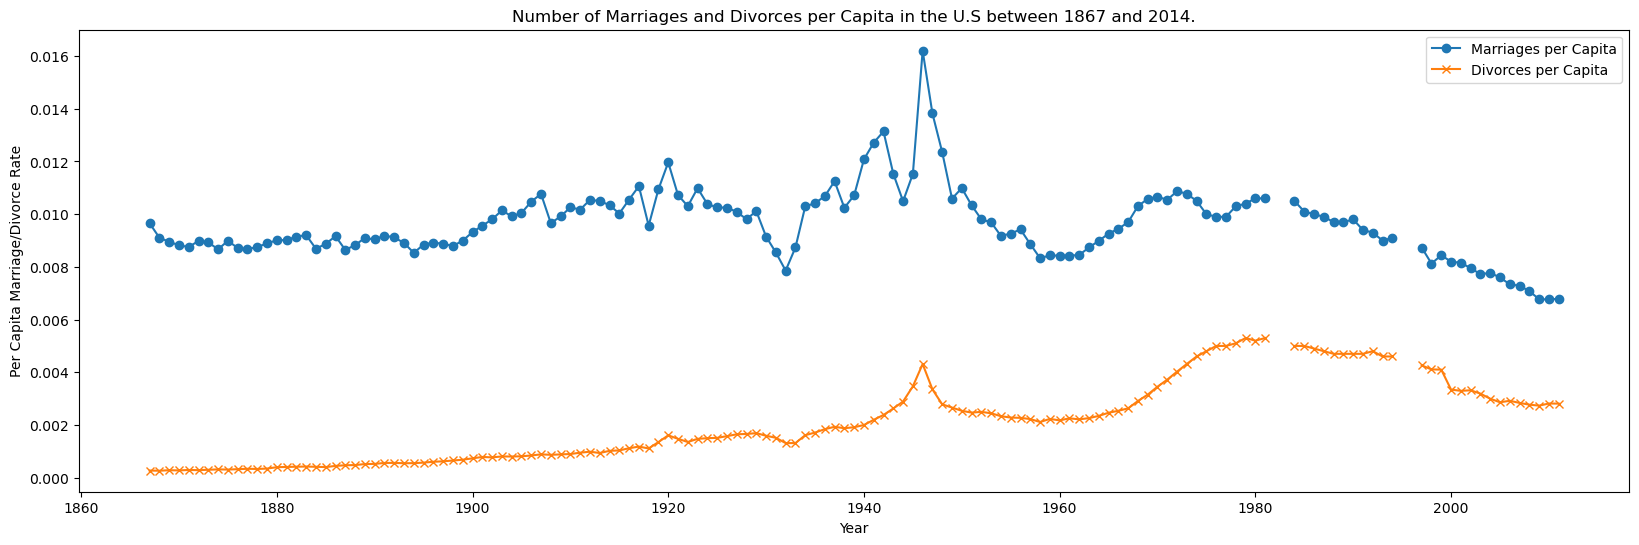

In [326]:
plt.figure(figsize=(20, 6))
plt.plot(df['Year'], df['Marriages']/df['Population'], label='Marriages per Capita', marker='o')
plt.plot(df['Year'], df['Divorces']/df['Population'], label='Divorces per Capita', marker='x')
plt.xlabel('Year')
plt.ylabel('Per Capita Marriage/Divorce Rate')
plt.legend()
plt.title('Number of Marriages and Divorces per Capita in the U.S between 1867 and 2014.')
plt.show()

### Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

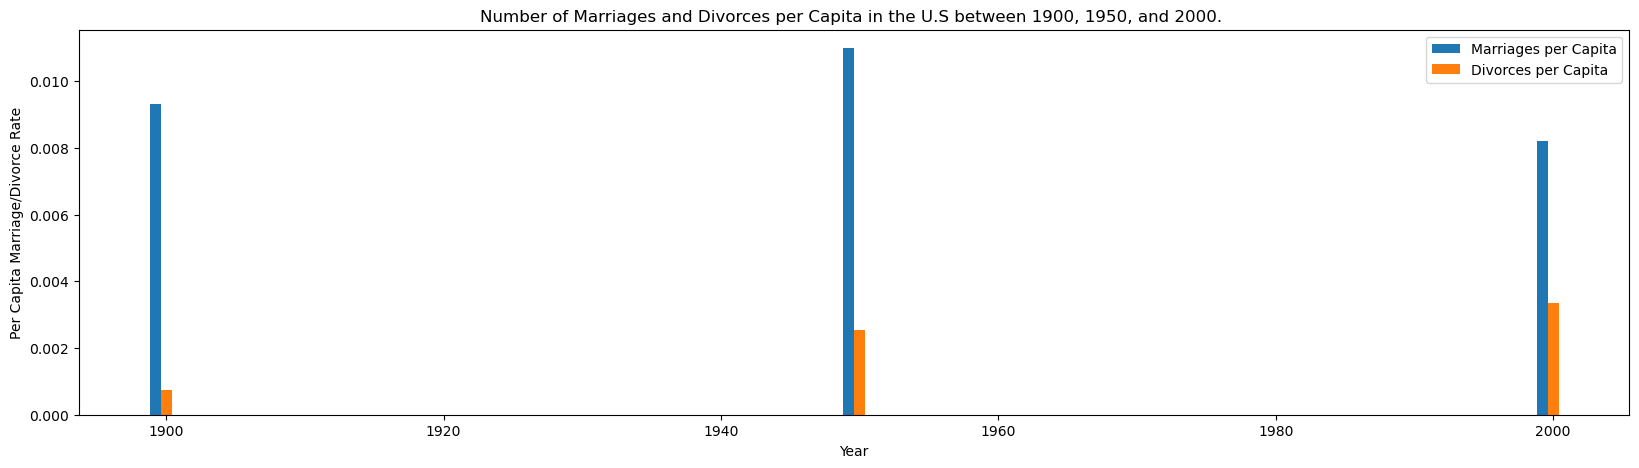

In [327]:
reduced_df = df[df['Year'].isin([1900,1950,2000])]

plt.figure(figsize=(20, 5))
plt.bar(reduced_df['Year']-0.8, reduced_df['Marriages']/reduced_df['Population'], label='Marriages per Capita')
plt.bar(reduced_df['Year'], reduced_df['Divorces']/reduced_df['Population'], label='Divorces per Capita')
plt.xlabel('Year')
plt.ylabel('Per Capita Marriage/Divorce Rate')
plt.legend()
plt.title('Number of Marriages and Divorces per Capita in the U.S between 1900, 1950, and 2000. ')
plt.show()

#### 8. Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sortthe actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [378]:
df = pd.read_csv('actor_kill_counts.csv')
df.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


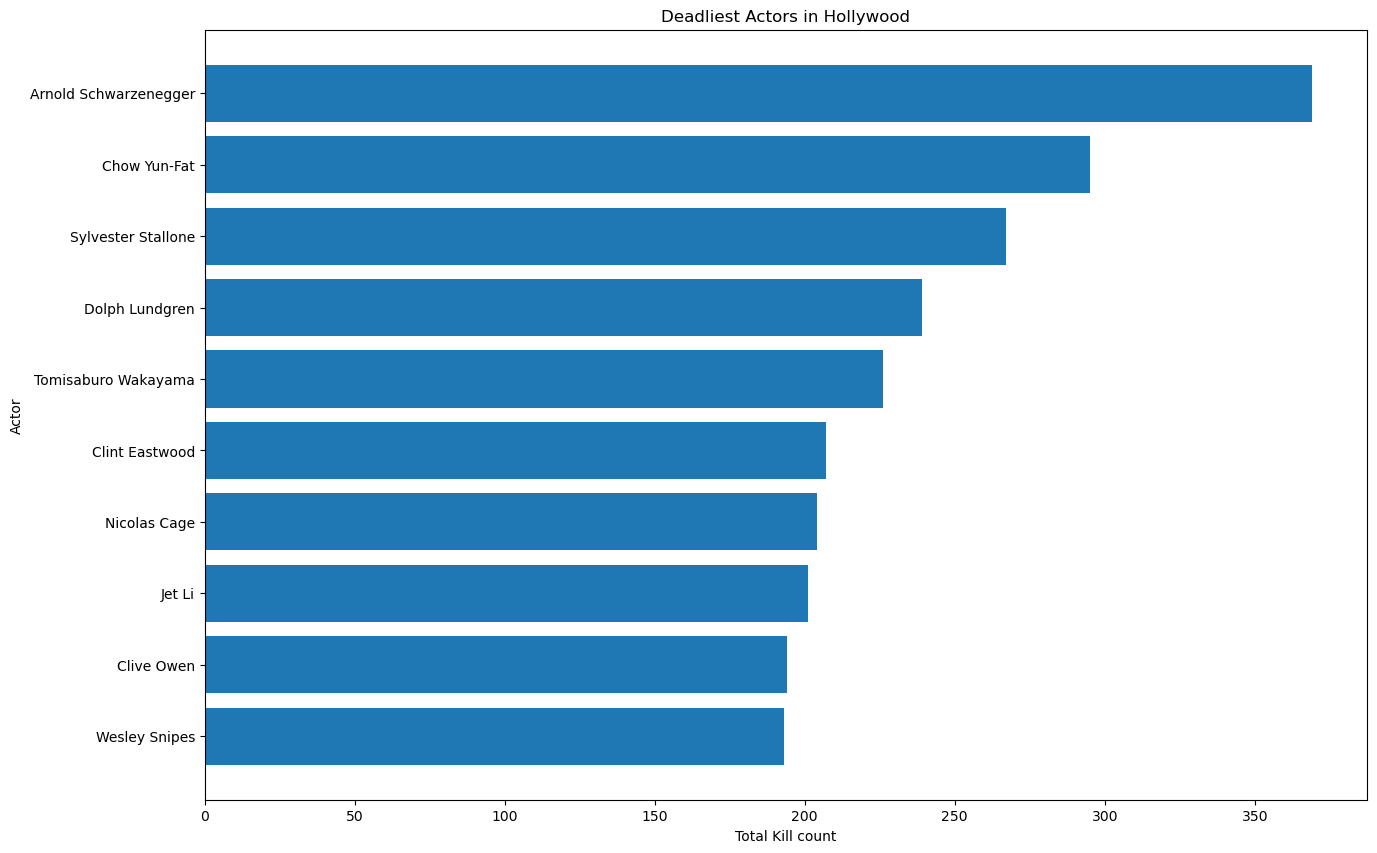

In [379]:
df = df.sort_values(by='Count', ascending=True).reset_index(drop=True)
plt.figure(figsize=(15, 10))
plt.barh(df['Actor'], df['Count'])
plt.xlabel('Total Kill count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.show()

### 9. Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [347]:
df = pd.read_csv('roman-emperor-reigns.csv')
df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [358]:
grouped_df = df.groupby(['Cause_of_Death']).count().reset_index(drop=False)

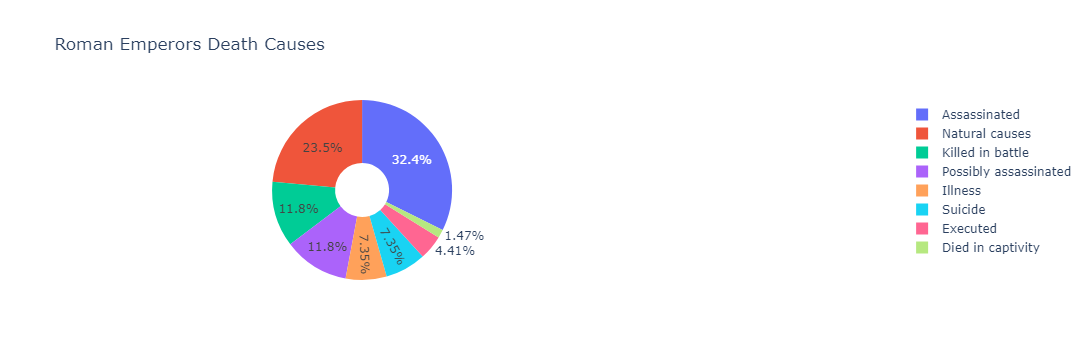

In [362]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go


# figure
fig = {
  "data": [
    {
      "values": list(grouped_df['Emperor'])  ,
      "labels": list(grouped_df['Cause_of_Death']) ,
      "domain": {"x": [.2, .5]},
      "name": "Roman Emperors Death Causes",
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Roman Emperors Death Causes",
        "annotations": [
        ]
    }
}
iplot(fig)

The output for this question is saved as an image with name RomanEmperorDeathplot.png

### Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

In [381]:
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
df.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


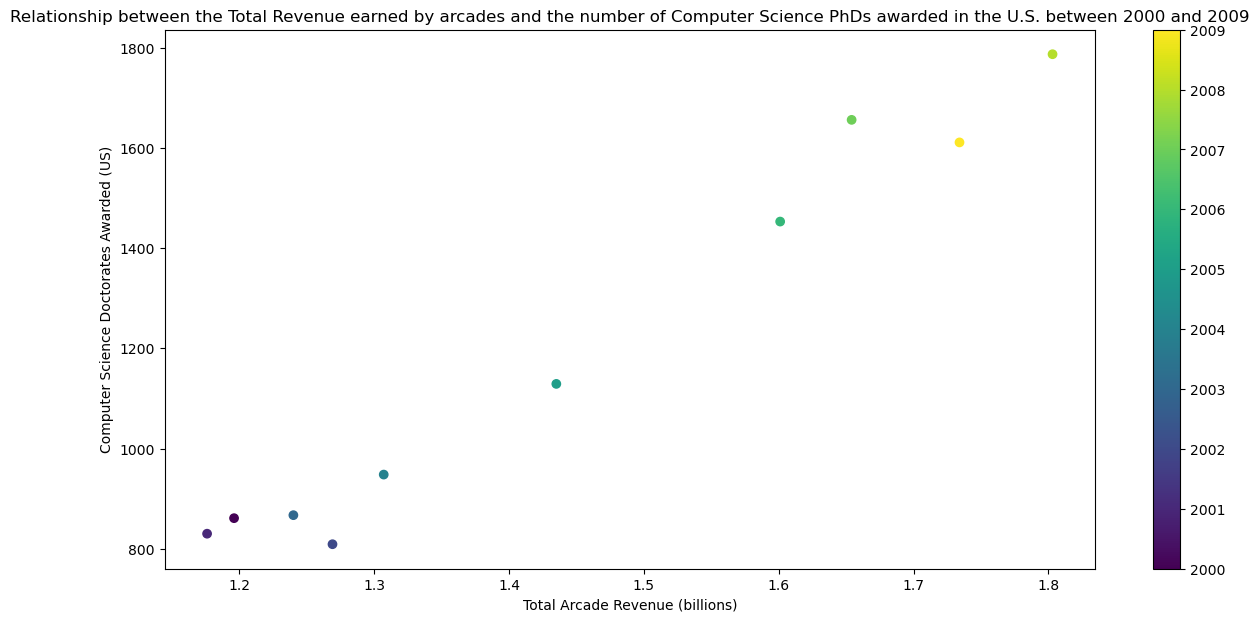

In [383]:
plt.figure(figsize=(15, 7))
plt.scatter(df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)'] , c=df['Year'])
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between the Total Revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009')
plt.colorbar() # Took reference from here https://www.geeksforgeeks.org/matplotlib-pyplot-colorbar-function-in-python/
plt.show()